<a href="https://colab.research.google.com/github/anshulmadan2022/anshulmadan2022/blob/main/LabTutorial222BAI10293.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB ASSIGNMENT 22BAI10293
q1. How do you implement a basic perceptron model in Python for binary classification tasks like logic gates?


In [1]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activate(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activate(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

perceptron = Perceptron(input_size=2)
perceptron.train(X, y)

for inputs in X:
    print(f"Input: {inputs}, Prediction: {perceptron.predict(inputs)}")

Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1


q2.  How can you represent the AND logic gate using a single-layer perceptron in Python? What are the necessary weights and biases?

In [2]:
import numpy as np

def step_function(x):
    return 1 if x >= 0 else 0

class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def predict(self, inputs):
        sum = np.dot(self.weights, inputs) + self.bias
        return step_function(sum)

weights = np.array([1, 1])
bias = -1.5

and_gate = Perceptron(weights, bias)

print("0 AND 0 =", and_gate.predict([0, 0]))
print("0 AND 1 =", and_gate.predict([0, 1]))
print("1 AND 0 =", and_gate.predict([1, 0]))
print("1 AND 1 =", and_gate.predict([1, 1]))

0 AND 0 = 0
0 AND 1 = 0
1 AND 0 = 0
1 AND 1 = 1


q3. How do you train a perceptron to simulate the OR logic gate in Python using manual weight updates based on the perceptron learning rule?

In [3]:
import numpy as np

def step_function(x):
    return 1 if x >= 0 else 0

class Perceptron:
    def __init__(self, num_inputs):
        self.weights = np.random.randn(num_inputs)
        self.bias = np.random.randn()

    def predict(self, inputs):
        sum = np.dot(self.weights, inputs) + self.bias
        return step_function(sum)

    def train(self, training_inputs, labels, learning_rate, epochs):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction

                self.weights += learning_rate * error * np.array(inputs)
                self.bias += learning_rate * error

training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])

or_gate = Perceptron(num_inputs=2)
or_gate.train(training_inputs, labels, learning_rate=0.1, epochs=100)

print("Weights after training:", or_gate.weights)
print("Bias after training:", or_gate.bias)
print("\nTesting the trained OR gate:")
print("0 OR 0 =", or_gate.predict([0, 0]))
print("0 OR 1 =", or_gate.predict([0, 1]))
print("1 OR 0 =", or_gate.predict([1, 0]))
print("1 OR 1 =", or_gate.predict([1, 1]))

Weights after training: [0.11383663 0.77852088]
Bias after training: -0.047556482141218104

Testing the trained OR gate:
0 OR 0 = 0
0 OR 1 = 1
1 OR 0 = 1
1 OR 1 = 1


q4. What modifications are required in a perceptron model to implement the XOR logic gate, and why can't a single-layer perceptron solve XOR in Python?

In [4]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2 * (self.y - self.output) * sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2 * (self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1))

        self.weights1 += d_weights1
        self.weights2 += d_weights2

    def train(self, iterations):
        for _ in range(iterations):
            self.feedforward()
            self.backprop()

X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]]).T
y = np.array([[0, 1, 1, 0]]).T

nn = NeuralNetwork(X, y)
nn.train(10000)

print(nn.output)

[[0.01039657]
 [0.98937737]
 [0.98968855]
 [0.01020623]]


q5. How can you use Python to visualise the decision boundary of a perceptron model while implementing a NOT logic gate?

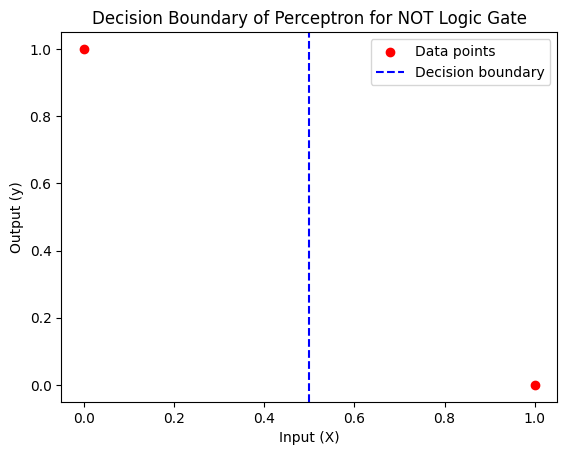

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

X = np.array([[0], [1]])
y = np.array([1, 0])

model = Perceptron()
model.fit(X, y)
w = model.coef_
b = model.intercept_

plt.scatter(X, y, color='red', label='Data points')

x_range = np.linspace(-0.5, 1.5, 200)

decision_boundary = -(b + w[0][0] * x_range)

plt.axvline(x=-b / w[0][0], color='blue', linestyle='--', label='Decision boundary')

plt.xlabel("Input (X)")
plt.ylabel("Output (y)")
plt.title("Decision Boundary of Perceptron for NOT Logic Gate")
plt.legend()

plt.show()
